In [1]:
import torchvision
import torch.nn as nn
from torchvision.utils import save_image, make_grid
import json
# from src.model import Net
import os
import torch
import matplotlib.pyplot as plt
import numpy as np

/home/xiaochen/anaconda3/envs/IFv2/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
os.chdir('..')

In [3]:

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                        download=True)
                                

In [4]:
def _subsample_by_classes(all_examples, labels, num_per_class=None):
    if num_per_class is None:
        return all_examples

    examples = {label: [] for label in labels}
    for example in all_examples:
        if example[1] in labels:
            examples[example[1]].append(example)

    picked_examples = []
    for label in labels:
        examples_with_label = examples[label][:num_per_class[label]]
        picked_examples.extend(examples_with_label)

        print(f'number of examples with label \'{label}\': '
            f'{len(examples_with_label)}')

    return picked_examples

In [5]:
trainset_sampled = _subsample_by_classes(trainset, [0,1,2,3,4,5,6,7,8,9], [100]*10)

number of examples with label '0': 100
number of examples with label '1': 100
number of examples with label '2': 100
number of examples with label '3': 100
number of examples with label '4': 100
number of examples with label '5': 100
number of examples with label '6': 100
number of examples with label '7': 100
number of examples with label '8': 100
number of examples with label '9': 100


In [23]:
target_path = 'outputs/mnist_good/gradient_IF_mnist_devId_9_epoch_0_batchsize_32.json'

In [24]:
# JSON file
with open (target_path, "r") as f:
     data_target = json.loads(f.read())


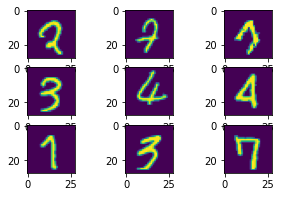

In [25]:
fig = plt.figure(figsize=(5, 3))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(trainset_sampled[data_target['helpful'][i]][0])

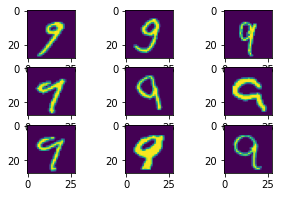

In [18]:
fig = plt.figure(figsize=(5, 3))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(trainset_sampled[data_target['harmful'][i]][0])

In [19]:
# JSON file
with open ('outputs/mnist_good/Percy_mnist_devId_9.json', "r") as f:
     data_groundtruth = json.loads(f.read())


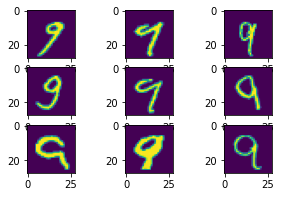

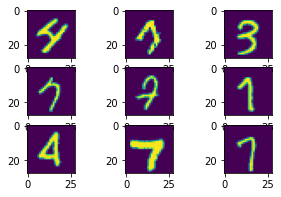

In [20]:
fig = plt.figure(figsize=(5, 3))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(trainset_sampled[data_groundtruth['helpful'][i]][0])
    
fig = plt.figure(figsize=(5, 3))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(trainset_sampled[data_groundtruth['harmful'][i]][0])

In [26]:
x =  -np.array(data_groundtruth['influence'])
y = np.array(data_target['influence'])*32
Correlation = round(np.corrcoef(x,y)[0,1],3)

Text(0.5, 1.0, 'correlation 0.895')

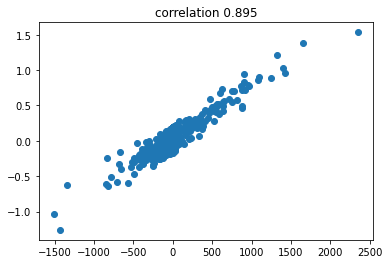

In [27]:
plt.scatter(x,y)
plt.title(f"correlation {Correlation}")

In [57]:
data_groundtruth['influence']

[0.6878760457806667,
 0.09967560277513854,
 38.20902409058854,
 0.3831040250416683,
 0.0827129537194305,
 0.11616899517516166,
 -1.9183437161191048,
 -3.5518305434463517,
 4.300912109426252,
 -3.9964435140375176,
 10.628764818823871,
 0.45450952195311856,
 1.1542640953796104,
 0.011577550532392011,
 0.07357675219408688,
 8.269101431537305,
 0.18113928912963834,
 -5.430125031992427,
 4.891929064223692,
 13.462910223010907,
 8.503142495106497,
 -0.725917526699883,
 -0.31807341011788653,
 10.318313106244844,
 20.368751263293305,
 -1.8510108849477225,
 120.17758474886405,
 0.8011744312105051,
 -16.78542546160243,
 -0.06957213007664531,
 -12.058991982697277,
 0.2008702854679139,
 0.5000429971646181,
 -1.2239669466389613,
 0.06576466639510642,
 3.520212317957993,
 4.466150393995445,
 0.48785761811285905,
 0.2805267799661915,
 0.18709808823905505,
 0.20330115339155663,
 0.7129424022407346,
 -1.6251523844216427,
 2.901605781168817,
 11.222317061956826,
 0.0797424890428492,
 -0.0340606743266178

In [44]:
np.corrcoef(x,y)[0,1],3

(0.8004297946608155, 3)